In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d 
from sklearn.cluster import KMeans
from sklearn import datasets
%matplotlib inline

In [2]:
np.random.seed(5)
iris = datasets.load_iris()
X = iris.data
y = iris.target

C:\Users\mcast\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\mcast\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


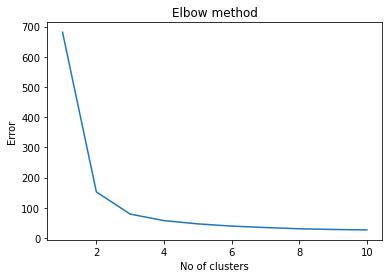

In [3]:
Error =[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i).fit(X)
    kmeans.fit(X)
    Error.append(kmeans.inertia_)
    
plt.plot(range(1, 11), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

In [4]:
kmeans.inertia_

26.42617741176952

In [5]:
estimators = [
    ("k_means_iris_8", KMeans(n_clusters=8)),
    ("k_means_iris_3", KMeans(n_clusters=3)),
]

In [69]:
def plot_scatter():
    y_est = est.fit_predict(X)
    plt.title(name)
    #plt.scatter(X[y_est == 0, 0], X[y_est == 0, 1],s = 100, c = 'red', label = 'Iris-setosa')
    #plt.scatter(X[y_est == 1, 0], X[y_est == 1, 1],s = 100, c = 'blue', label = 'Iris-versicolour')
    #plt.scatter(X[y_est == 2, 0], X[y_est == 2, 1],s = 100, c = 'green', label = 'Iris-virginica')
    plt.scatter(X[:, 0], X[:,1], c=y_est, cmap='rainbow')
    if ('k_mean' in name):
        plt.scatter(est.cluster_centers_[:, 0], est.cluster_centers_[:,1],s = 100, c = 'black', label = 'Centroids')
        print(est.cluster_centers_)
    plt.legend()
    plt.show()

[[6.61666667 3.07916667 5.5625     2.1375    ]
 [4.70454545 3.12272727 1.41363636 0.2       ]
 [5.62083333 2.69166667 4.075      1.2625    ]
 [7.54       3.15       6.39       2.09      ]
 [5.24285714 3.66785714 1.5        0.28214286]
 [6.43       2.94       4.59       1.435     ]
 [6.02777778 2.73333333 5.02777778 1.79444444]
 [5.         2.3        3.275      1.025     ]]


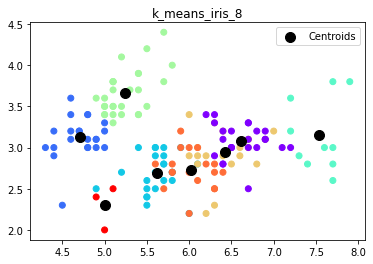

In [70]:
name, est = estimators[0]
plot_scatter()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


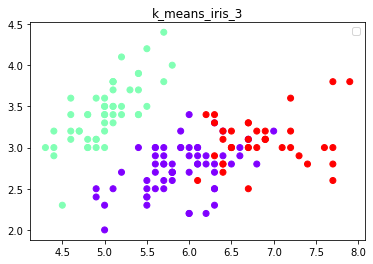

In [66]:
name, est = estimators[1]
plot_scatter()

In [14]:
from sklearn import metrics

In [40]:
#Rand Index
print(name)
y_est = est.fit_predict(X)
print(f'rand score {metrics.rand_score(y, y_est)}')
print(f'adjusted rand score {metrics.adjusted_rand_score(y, y_est)}')

k_means_iris_3
rand score 0.8797315436241611
adjusted rand score 0.7302382722834697


In [19]:
print(f'perfect rand score {metrics.rand_score(y, y)}')
print(f'perfect adjusted rand score {metrics.adjusted_rand_score(y, y)}')

perfect rand score 1.0
perfect adjusted rand score 1.0


In [22]:
print(name)
print(f'adjusted_mutual_info_score {metrics.adjusted_mutual_info_score(y, y_est)}')
print(f'normalized adjusted_mutual_info_score {metrics.normalized_mutual_info_score(y, y_est)}')

k_means_iris_3
adjusted_mutual_info_score 0.7551191675800484
normalized adjusted_mutual_info_score 0.7581756800057785


In [25]:
print(name)
#homogeneity: each cluster contains only members of a single class.
print(f'homogeneity {metrics.homogeneity_score(y, y_est)}')
#completeness: all members of a given class are assigned to the same cluster
print(f'completeness {metrics.completeness_score(y, y_est)}')
#Their harmonic mean called V-measure is computed by v_measure_score:
print(f'v-measure {metrics.v_measure_score(y, y_est)}')


k_means_iris_3
homogeneity 0.7514854021988339
completeness 0.7649861514489816
v-measure 0.7581756800057786


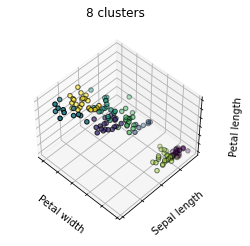

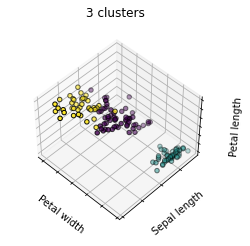

In [34]:
fignum = 1
for name, est in estimators:
    fig = plt.figure(fignum, figsize=(4, 3))
    ax = fig.add_subplot(111, projection="3d", elev=48, azim=134)
    ax.set_position([0, 0, 0.95, 1])
    est.fit(X)
    labels = est.labels_

    ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=labels.astype(float), edgecolor="k")

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel("Petal width")
    ax.set_ylabel("Sepal length")
    ax.set_zlabel("Petal length")
    ax.set_title(titles[fignum - 1])
    ax.dist = 12
    fignum = fignum + 1

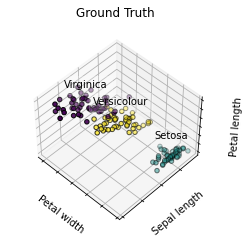

In [35]:
y = iris.target
fig = plt.figure(fignum, figsize=(4, 3))
ax = fig.add_subplot(111, projection="3d", elev=48, azim=134)
ax.set_position([0, 0, 0.95, 1])

for name, label in [("Setosa", 0), ("Versicolour", 1), ("Virginica", 2)]:
    ax.text3D(
        X[y == label, 3].mean(),
        X[y == label, 0].mean(),
        X[y == label, 2].mean() + 2,
        name,
        horizontalalignment="center",
        bbox=dict(alpha=0.2, edgecolor="w", facecolor="w"),
    )
y = np.choose(y, [1, 2, 0]).astype(float)
ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=y, edgecolor="k")

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel("Petal width")
ax.set_ylabel("Sepal length")
ax.set_zlabel("Petal length")
ax.set_title("Ground Truth")
ax.dist = 12


In [60]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import kneighbors_graph
#connectivity = kneighbors_graph(X, n_neighbors=3, include_self=False)
ward = cluster.AgglomerativeClustering(n_clusters=3, linkage="ward")
#ward = cluster.AgglomerativeClustering(n_clusters=3, linkage="ward", connectivity=connectivity)

In [74]:
print('Ward')
y_est = ward.fit_predict(X)
print(f'rand score {metrics.rand_score(y, y_est)}')
print(f'adjusted rand score {metrics.adjusted_rand_score(y, y_est)}')
print(f'homogeneity {metrics.homogeneity_score(y, y_est)}')
print(f'completeness {metrics.completeness_score(y, y_est)}')
print(f'v-measure {metrics.v_measure_score(y, y_est)}')


Ward
rand score 0.8797315436241611
adjusted rand score 0.7311985567707746
homogeneity 0.7608008469718723
completeness 0.7795958005591144
v-measure 0.7700836616487869


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


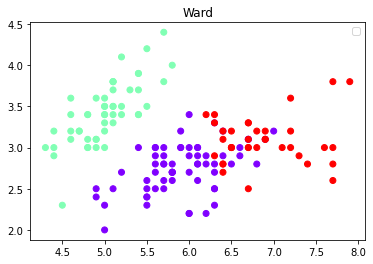

In [71]:
name='Ward'
est = ward
plot_scatter()

In [73]:
gmm = mixture.GaussianMixture(n_components=3, covariance_type="full")

In [75]:
print('GMM')
y_est = gmm.fit_predict(X)
print(f'rand score {metrics.rand_score(y, y_est)}')
print(f'adjusted rand score {metrics.adjusted_rand_score(y, y_est)}')
print(f'homogeneity {metrics.homogeneity_score(y, y_est)}')
print(f'completeness {metrics.completeness_score(y, y_est)}')
print(f'v-measure {metrics.v_measure_score(y, y_est)}')


GMM
rand score 0.9574944071588367
adjusted rand score 0.9038742317748124
homogeneity 0.8983263672602775
completeness 0.9010648908640206
v-measure 0.8996935451597475


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


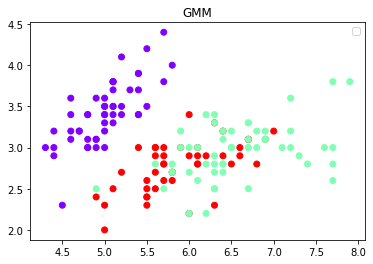

In [76]:
name='GMM'
est = gmm
plot_scatter()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


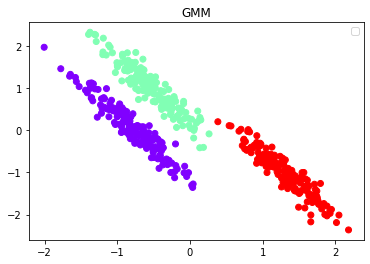

In [91]:
def plot_ground():
    plt.title(name)
    #plt.scatter(X[y_est == 0, 0], X[y_est == 0, 1],s = 100, c = 'red', label = 'Iris-setosa')
    #plt.scatter(X[y_est == 1, 0], X[y_est == 1, 1],s = 100, c = 'blue', label = 'Iris-versicolour')
    #plt.scatter(X[y_est == 2, 0], X[y_est == 2, 1],s = 100, c = 'green', label = 'Iris-virginica')
    plt.scatter(X[:, 0], X[:,1], c=y, cmap='rainbow')
    plt.legend()
    plt.show()
    
plot_ground()

In [94]:
#Datos distribuidos
from sklearn import datasets
random_state = 170
X, y = datasets.make_blobs(n_samples=500, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X = np.dot(X, transformation)
X[0:10]

array([[ 1.7302065 , -1.84865675],
       [ 0.35978844, -0.33760978],
       [-2.98133596,  3.0805867 ],
       [ 2.38685572, -2.84299467],
       [-3.31564236,  0.65601884],
       [-2.85317502,  2.71206307],
       [ 1.5793803 , -1.54723713],
       [-1.29391258,  0.29429035],
       [-2.40473362,  0.27536706],
       [-3.611718  ,  2.10729892]])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


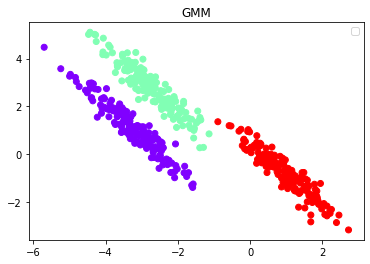

In [96]:
plot_ground()

In [97]:
name, est = estimators[1]
print(name)
y_est = est.fit_predict(X)
print(f'rand score {metrics.rand_score(y, y_est)}')
print(f'adjusted rand score {metrics.adjusted_rand_score(y, y_est)}')
print(f'homogeneity {metrics.homogeneity_score(y, y_est)}')
print(f'completeness {metrics.completeness_score(y, y_est)}')
print(f'v-measure {metrics.v_measure_score(y, y_est)}')

k_means_iris_3
rand score 0.8049699398797595
adjusted rand score 0.5603635166697578
homogeneity 0.5959555560649974
completeness 0.5961127099287725
v-measure 0.5960341226378569


[[-3.35093983  2.94850804]
 [ 1.02650785 -0.87527581]
 [-2.53727016  0.85785184]]


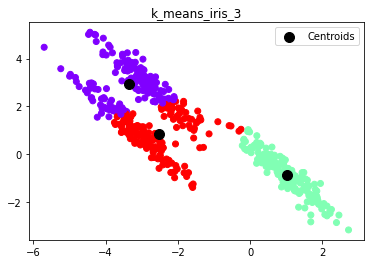

In [98]:
plot_scatter()

# Actividad #6
Utilizando el ultimo dataset realice el analisis de clasificacion usando los algoritmos 
* GMM
* Ward
